<a href="https://colab.research.google.com/github/Hoa20146128/Fuzzy_NoiCom/blob/main/Fuzzy_NoiCom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8701f9550dc900336b4e9534f3a73d645d29e8e233375838b9291b7695de9720
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#-----------------------
time = ctrl.Antecedent(np.arange(0,165,1),'Time') #Antecedent: input
rice = ctrl.Antecedent(np.arange(200,1010,1),'Rice')
power = ctrl.Consequent(np.arange(0,105,1),'Power') #Consequent : output
#automf(3)
time['very_fast'] = fuzz.trimf(time.universe,[0,15,30])
time['fast'] = fuzz.trimf(time.universe,[15,30,60])
time['average'] = fuzz.trimf(time.universe,[30,60,90])
time['slow'] = fuzz.trimf(time.universe,[60,90,120])
time['very_slow'] = fuzz.trimf(time.universe,[90,120,160])

rice['very_less'] = fuzz.trimf(rice.universe,[200,300,400])
rice['less'] = fuzz.trimf(rice.universe,[300,400,550])
rice['average'] = fuzz.trimf(rice.universe,[400,550,650])
rice['much'] = fuzz.trimf(rice.universe,[550,650,800])
rice['very_much'] = fuzz.trimf(rice.universe,[650,800,1000])

power['very_small'] = fuzz.trimf(power.universe,[0,0,30])
power['small'] = fuzz.trimf(power.universe,[0,30,50])
power['average'] = fuzz.trimf(power.universe,[30,50,80])
power['high'] = fuzz.trimf(power.universe,[50,80,100])
power['very_high'] = fuzz.trimf(power.universe,[80,100,100])

#time.view()
#rice.view()
#power.view()

#rules
rule1 = ctrl.Rule(time['very_fast']&rice['very_less'],power['high'])
rule2 = ctrl.Rule(time['fast']&rice['very_less'],power['high'])
rule3 = ctrl.Rule(time['average']&rice['very_less'],power['average'])
rule4 = ctrl.Rule(time['slow']&rice['very_less'],power['small'])
rule5 = ctrl.Rule(time['very_slow']&rice['very_less'],power['very_small'])

rule6 = ctrl.Rule(time['very_fast']&rice['less'],power['very_high'])
rule7 = ctrl.Rule(time['fast']&rice['less'],power['high'])
rule8 = ctrl.Rule(time['average']&rice['less'],power['high'])
rule9 = ctrl.Rule(time['slow']&rice['less'],power['average'])
rule10 = ctrl.Rule(time['very_slow']&rice['less'],power['small'])

rule11 = ctrl.Rule(time['very_fast']&rice['average'],power['very_high'])
rule12 = ctrl.Rule(time['fast']&rice['average'],power['high'])
rule13 = ctrl.Rule(time['average']&rice['average'],power['high'])
rule14 = ctrl.Rule(time['slow']&rice['average'],power['average'])
rule15 = ctrl.Rule(time['very_slow']&rice['average'],power['small'])

rule16 = ctrl.Rule(time['very_fast']&rice['much'],power['very_high'])
rule17 = ctrl.Rule(time['fast']&rice['much'],power['very_high'])
rule18 = ctrl.Rule(time['average']&rice['much'],power['high'])
rule19 = ctrl.Rule(time['slow']&rice['much'],power['average'])
rule20 = ctrl.Rule(time['very_slow']&rice['much'],power['average'])

rule21 = ctrl.Rule(time['very_fast']&rice['very_much'],power['very_high'])
rule22 = ctrl.Rule(time['fast']&rice['very_much'],power['very_high'])
rule23 = ctrl.Rule(time['average']&rice['very_much'],power['high'])
rule24 = ctrl.Rule(time['slow']&rice['very_much'],power['average'])
rule25 = ctrl.Rule(time['very_slow']&rice['very_much'],power['average'])






76.38888888888896


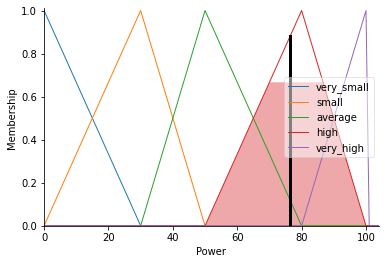

In [ ]:
powering_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule6,rule7,rule8,rule9,rule10,rule12,rule13,rule14,rule15,rule16,rule17,
                                    rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Rice'] = 500
powering.input['Time']= 60
powering.compute()
print(powering.output['Power'])
power.view(sim = powering)

53.611111111111136


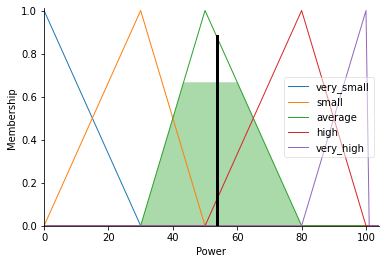

In [ ]:
powering_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                                    rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
                                    rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(powering_ctrl)
powering.input['Time'] = 120   # Time 10 - 180 minutes 
powering.input['Rice'] = 700    # Rice 200 - 1000 gram
powering.compute()
print(powering.output['Power'])
power.view(sim = powering)

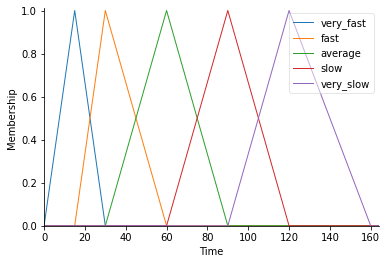

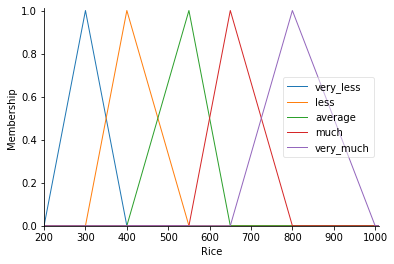

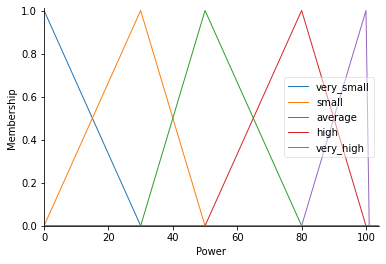

In [ ]:
time.view()
rice.view()
power.view()